<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural
- Taller #4: Adquisición de textos
- Docente: Viviana Marquez


In [1]:
import re
import pandas as pd

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from sklearn.feature_extraction.text import CountVectorizer

# Punto 1: Pre-Procesamiento
- [11 pts] Leer el archivo dialogos.csv usando pandas
- [11 pts] Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números y sin palabras vacias

In [2]:
# Leer el archivo dialogos.csv usando pandas

import pandas as pd
import numpy as np
Dialogos = pd.read_csv('C:/Users/practicas/Documents/dialogos.csv')
Dialogos

,Locución
0,Francamente no
1,"Lo del canadiense. Por favor, como que vosotro..."
2,Tienes razón. A lo mejor así te liberas de tu ...
3,"Pues, tú sabrás"
4,Para mí que fue Krieger
...,...
954,"Yo qué sé, digo yo qué será"
955,Lo han entendido mal. Las joyas que venden en ...
956,Oooo... Me llamo Vivian
957,¿De dónde? ¿Del coño de tu madre?


In [3]:
# Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números y sin palabras vacias

Dialogos['pre-procesada']=(Dialogos['Locución'].str.lower().replace({"[\W\d_]+": ' '}, regex=True).str.split()).apply(lambda x: ' '.join([palabra for palabra in x if palabra not in (stopwords_sp)]))
Dialogos

,Locución,pre-procesada
0,Francamente no,francamente
1,"Lo del canadiense. Por favor, como que vosotro...",canadiense favor tiraríais allí si pudieseis
2,Tienes razón. A lo mejor así te liberas de tu ...,razón mejor así liberas energía nagativa
3,"Pues, tú sabrás",pues sabrás
4,Para mí que fue Krieger,krieger
...,...,...
954,"Yo qué sé, digo yo qué será",sé digo
955,Lo han entendido mal. Las joyas que venden en ...,entendido mal joyas venden canales siquiera in...
956,Oooo... Me llamo Vivian,oooo llamo vivian
957,¿De dónde? ¿Del coño de tu madre?,dónde coño madre


# Punto 2: Representación vectorial
- [11 pts] Crear una bolsa de palabras (BoW) del corpus usando la columna pre-procesada
- [11 pts] ¿Cuántas palabras hay en el vocabulario? (Usando la función de sklearn)

In [4]:
# Crear una bolsa de palabras (BoW) del corpus usando la columna pre-procesada

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(Dialogos['pre-procesada'].values)
print(f"Vocabulario: {count_vect.vocabulary_}")

Vocabulario: {'francamente': 822, 'canadiense': 274, 'favor': 803, 'tiraríais': 1939, 'allí': 63, 'si': 1817, 'pudieseis': 1597, 'razón': 1660, 'mejor': 1236, 'así': 133, 'liberas': 1115, 'energía': 696, 'nagativa': 1309, 'pues': 1605, 'sabrás': 1742, 'krieger': 1092, 'bebé': 184, 'lando': 1101, 'serio': 1804, 'randy': 1655, 'creo': 474, 'deporte': 580, 'hizo': 959, 'daño': 539, 'cerebro': 315, 'estáte': 770, 'quieto': 1641, 'esperad': 749, 'parecido': 1430, 'archer': 110, 'asustado': 130, 'usted': 2004, 'jode': 1052, 'carajo': 288, 'dios': 624, 'pibe': 1497, 'oigo': 1384, 'claro': 349, 'fuma': 835, 'junto': 1080, 'niña': 1336, 'decir': 552, 'robotizado': 1721, 'dónde': 668, 'coño': 458, 'sacado': 1748, 'mano': 1210, 'biónica': 197, 'venga': 2034, 'subid': 1870, 'atrás': 139, 'avión': 152, 'esperando': 751, 'recordadme': 1670, 'desgraciado': 595, 'mata': 1223, 'haga': 929, 'jodas': 1051, 'cyril': 515, 'haces': 925, 'ventana': 2040, 'existe': 784, 'refrán': 1684, 'hindu': 958, 'dice': 6

In [7]:
# ¿Cuántas palabras hay en el vocabulario? (Usando la función de sklearn)
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(Dialogos['pre-procesada'].values)
len(count_vect.vocabulary_)

2115

# Punto 3: 🤔
- [3pts] ¿En qué casos es buena idea tomar en la cuenta la frecuencia de las palabras para la bolsa de palabras?
- [3pts] ¿Cuándo es una mejor idea usar una bolsa de n-gramas en vez de una bolsa de palabras

#### ¿En qué casos es buena idea tomar en la cuenta la frecuencia de las palabras para la bolsa de palabras?

Es  útil para seleccionar las palabras distintivas de un documento, ignorando el orden de las palabras ya que se logra tener una representación de cada documento, en función de las palabras que este contiene.


#### ¿Cuándo es una mejor idea usar una bolsa de n-gramas en vez de una bolsa de palabras

Es mejor utilizar n-gramas cuando se desea obtenr secuencias de palabras.

La bolsa de palabras, deja de lado el orden en que se puedan encontrar las palabras, mientras que con  n-gramas, la secuencia de palabras es sucesivas y permiten obtener no sólo palabras, sino secuencias de palabras considerandoel orden en que se encuentran.


# BONUS Punto 4: 😜
[1pt] ¿A qué pertenecen los dialogos del primer punto?

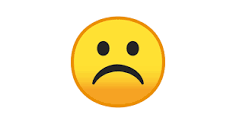